In [1]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import seaborn as sns
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset




from skmultilearn.model_selection import iterative_train_test_split



### Helper Functions

- Model Performance_plot: This helper function displays how the accuracy, F1 Score and Hamming loss vary according to the prediction threshold. This function only works with sklearns machine learning algorithms that have the predict_proba method. 

In [2]:
def model_performance_plot():
    '''
    This helper function displays how the accuracy, 
    F1 Score and Hamming loss vary according to the prediction threshold. 
    This function only works with sklearns machine learning algorithms that have the predict_proba method. 
    __________________________________________________________________________
    '''

    th = []
    f = []
    ham = []
    ac = []

    for t in range (5,60): # threshold value
        y_pred_new = (predictions_proba >= t/100).astype(int)
        th.append(t)
        ac.append(accuracy_score(y_test,y_pred_new))
        f.append(f1_score(y_test,y_pred_new, average="micro"))
        ham.append(hamming_loss(y_test,y_pred_new))
    plt.rcParams["figure.figsize"] = (12,6)
    with plt.style.context('ggplot'):
        plt.plot(th, f)
        plt.plot(th, ham)
        plt.plot(th, ac)
        plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
        plt.ylabel("metrics", fontsize = 14)
        plt.xlabel("threshold", fontsize = 14)
        plt.title("Classfier Chain Model", fontsize = 18)
    plt.show()
    
    
def group_labels_in_column(df):
    '''
    This function stacks all the target columns into a single column. 
    '''
    text = []
    category = []

    for index, row in df.iterrows():
        for value in row.iteritems():
    #         print(value)
            if value[1] == 1:
                category.append(value[0])
                text.append(row[0])
            else:
                next

    tweets_new = pd.DataFrame({'text':text, 'category':category})


    X = tweets_new.iloc[:,0]
    y = tweets_new.iloc[:, 1]


### Reading Data


In [3]:
import sys
sys.path.append('../helper_functions/')

# Helper Functions module that maps BRAT's annotation file with the text file. 
import helper_functions

tweets_new = helper_functions.annotation_merger(path_to_txt_file= '../brat-v1.3_Crunchy_Frog/data/first-iter/sampled_58_30.txt',
                 path_to_ann_file= '../brat-v1.3_Crunchy_Frog/data/first-iter/sampled_58_30.ann')



# Replace values larger than 1 with 1. 
tweets_new.iloc[:, 1:] = tweets_new.iloc[:, 1:].mask(tweets_new.iloc[:,1:] > 1, 1)
## tweets_new.iloc[:, 1:][tweets_new.iloc[:, 1:] < 1].fillna(1) # other way to do this

# Create X and y variables.  
X = tweets_new.iloc[:,0]
y = tweets_new.iloc[:, 1:]

# Traint test split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)



## Models

### Naive Bayes

/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)



    Accuracy: 0.2222222222222222
    Recall: 0.85
    F1: 0.6693269230769231



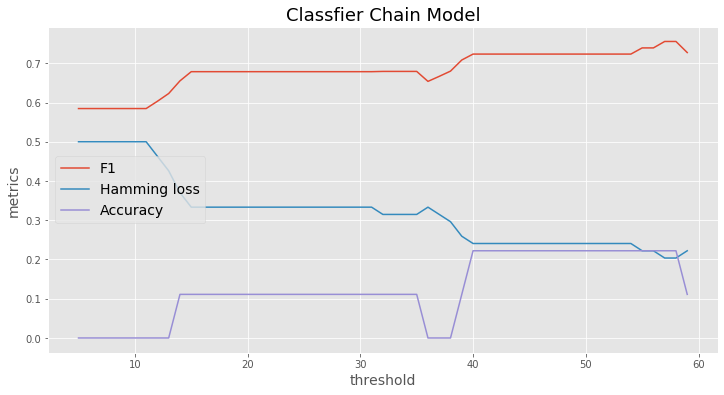

In [4]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('tfidf_trans', TfidfTransformer()),
                ('clf', BinaryRelevance(MultinomialNB(
                    fit_prior=True, class_prior=None))),
                ])

NB_pipeline.fit(X_train, y_train)

prediction = NB_pipeline.predict(X_test)
predictions_proba = NB_pipeline.predict_proba(X_test)

print(
f'''
    Accuracy: {accuracy_score(y_test, prediction)}
    Recall: {recall_score(y_test, prediction, average = 'weighted')}
    F1: {f1_score(y_test, prediction, average = 'weighted')}
'''
)

# print(NB_pipeline.predict_proba(X_test)[0])

    
model_performance_plot()

### Support vector classifier 

In [5]:
# categories = X_trai.category

from sklearn.ensemble import RandomForestClassifier

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('tfidf_trans', TfidfTransformer()),
                ('clf', LabelPowerset(LinearSVC(random_state = 21))),
            ])

SVC_pipeline.fit(X_train, y_train)
prediction = SVC_pipeline.predict(X_test)


print(
f'''
    Accuracy: {accuracy_score(y_test, prediction)}
    Recall: {recall_score(y_test, prediction, average = 'weighted')}
    F1: {f1_score(y_test, prediction, average = 'weighted')}
'''
)




    Accuracy: 0.3333333333333333
    Recall: 0.75
    F1: 0.6954545454545455



/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


### Logistic Regression

/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)



    Accuracy: 0.2222222222222222
    Recall: 0.85
    F1: 0.6693269230769231



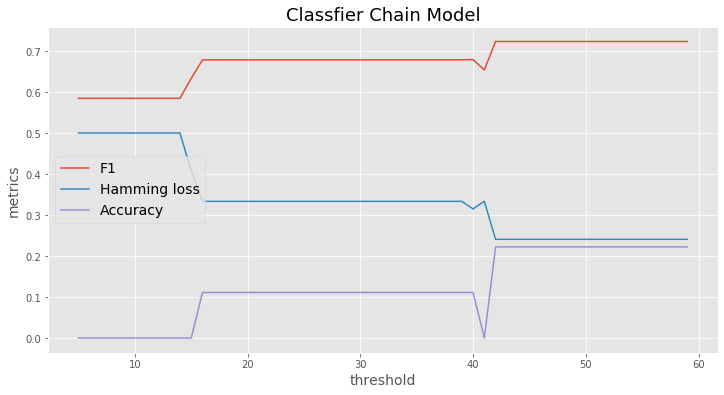

In [6]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('tfidf_trans', TfidfTransformer()),
                ('clf', LabelPowerset(LogisticRegression(solver='sag', random_state = 21))),
            ])

LogReg_pipeline.fit(X_train, y_train)
prediction = LogReg_pipeline.predict(X_test)
predictions_proba = LogReg_pipeline.predict_proba(X_test)

print(
f'''
    Accuracy: {accuracy_score(y_test, prediction)}
    Recall: {recall_score(y_test, prediction, average = 'weighted')}
    F1: {f1_score(y_test, prediction, average = 'weighted')}
'''
)

model_performance_plot()

### Stochastic Gradient Descent Classifier

/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)



    Accuracy: 0.3333333333333333
    Recall: 0.65
    F1: 0.675



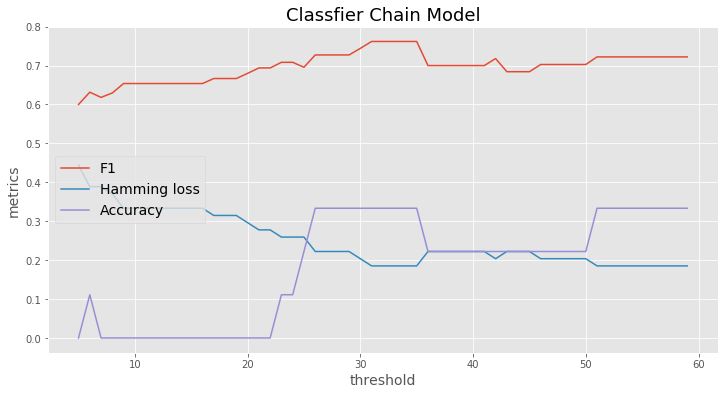

In [7]:
SGDClassifier = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('tfidf_trans', TfidfTransformer()),
                ('clf', LabelPowerset(SGDClassifier(random_state = 21, loss="log", penalty="elasticnet"))),
            ])

SGDClassifier.fit(X_train, y_train)
prediction = SGDClassifier.predict(X_test)
predictions_proba = SGDClassifier.predict_proba(X_test)

print(
f'''
    Accuracy: {accuracy_score(y_test, prediction)}
    Recall: {recall_score(y_test, prediction, average = 'weighted')}
    F1: {f1_score(y_test, prediction, average = 'weighted')}
'''
)

model_performance_plot()